     Store ID  Product ID        Date  Units Sold  Sales Revenue (USD)  \
0  Spearsland    52372247  2022-01-01           9              2741.69   
1  Spearsland    52372247  2022-01-02           7              2665.53   
2  Spearsland    52372247  2022-01-03           1               380.79   
3  Spearsland    52372247  2022-01-04           4              1523.16   
4  Spearsland    52372247  2022-01-05           2               761.58   

   Discount Percentage  Marketing Spend (USD)             Store Location  \
0                   20                     81                   Tanzania   
1                    0                      0                 Mauritania   
2                    0                      0  Saint Pierre and Miquelon   
3                    0                      0                  Australia   
4                    0                      0                  Swaziland   

  Product Category Day of the Week  Holiday Effect  
0        Furniture        Saturday           

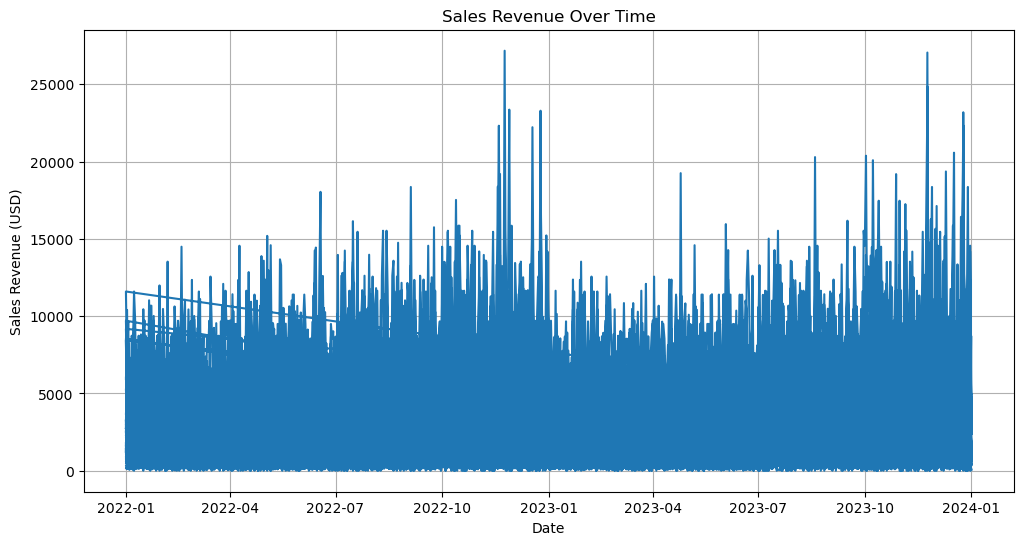

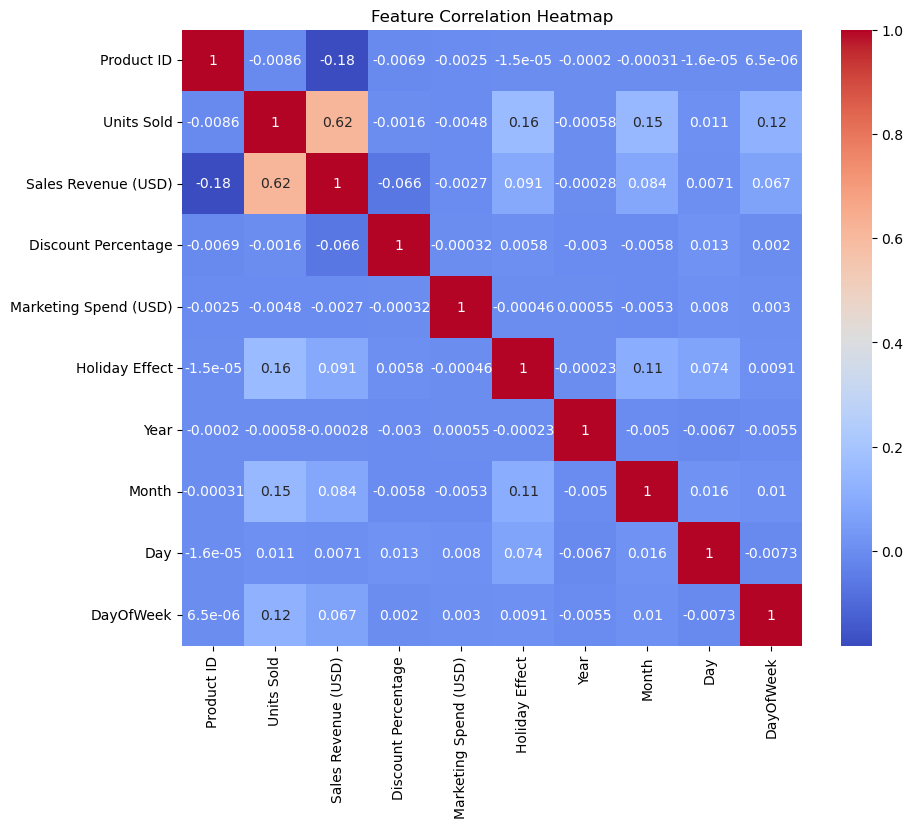

Linear Regression Evaluation:
  RMSE: 2033.72
  MAE: 1553.41
  R²: 0.38
------------------------------
Random Forest Evaluation:
  RMSE: 2228.80
  MAE: 1658.90
  R²: 0.26
------------------------------


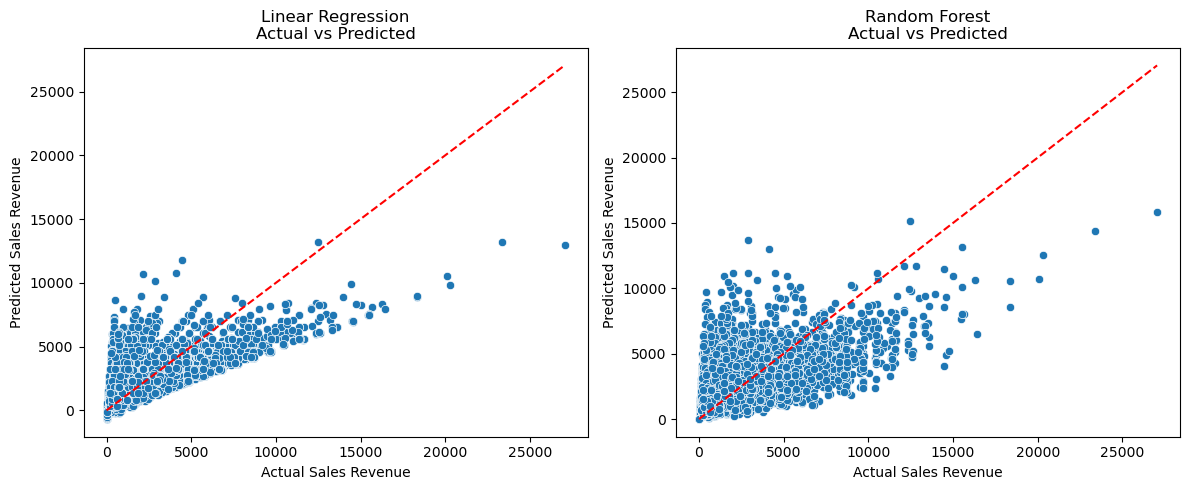

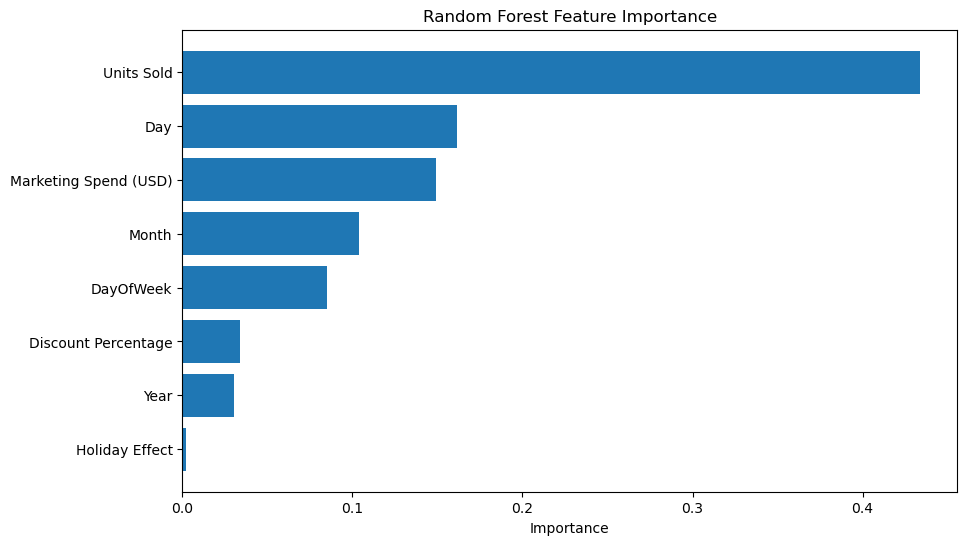


✅ Models saved successfully.


In [24]:
# Part 1: Import all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
#from xgboost import XGBRegressor  # Uncomment if needed

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib
import warnings
warnings.filterwarnings('ignore')

# Part 2: Load Retail_sales.csv
df = pd.read_csv('Retail_sales.csv')
print(df.head())

# Part 3: Handle missing data, create new features
print("\nMissing values before handling:")
print(df.isnull().sum())

df.fillna(df.median(numeric_only=True), inplace=True)

# If 'Date' column exists, create time-based features
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'])
    df['Year'] = df['Date'].dt.year
    df['Month'] = df['Date'].dt.month
    df['Day'] = df['Date'].dt.day
    df['DayOfWeek'] = df['Date'].dt.dayofweek

# Part 4: EDA (Trends + Correlations)
if 'Date' in df.columns and 'Sales Revenue (USD)' in df.columns:
    plt.figure(figsize=(12,6))
    plt.plot(df['Date'], df['Sales Revenue (USD)'])
    plt.title('Sales Revenue Over Time')
    plt.xlabel('Date')
    plt.ylabel('Sales Revenue (USD)')
    plt.grid()
    plt.show()

# Correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

# Part 5: Prepare data
# Drop unnecessary columns
X = df.drop(columns=['Sales Revenue (USD)'], errors='ignore')
if 'Date' in X.columns:
    X = X.drop(columns=['Date'])
if 'Store ID' in X.columns:
    X = X.drop(columns=['Store ID'])
if 'Product ID' in X.columns:
    X = X.drop(columns=['Product ID'])
if 'Store Location' in X.columns:
    X = X.drop(columns=['Store Location'])
if 'Product Category' in X.columns:
    X = X.drop(columns=['Product Category'])
if 'Day of the Week' in X.columns:
    X = X.drop(columns=['Day of the Week'])

# Convert categorical columns to dummy variables if needed
X = pd.get_dummies(X)

y = df['Sales Revenue (USD)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Part 6: Baseline Model — Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Part 7: Advanced Models — Random Forest (XGBoost commented out)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# XGBoost (optional)
#xgb_model = XGBRegressor(n_estimators=100, random_state=42, objective='reg:squarederror')
#xgb_model.fit(X_train, y_train)
#y_pred_xgb = xgb_model.predict(X_test)

# Part 8: Evaluation
def evaluate_model(y_true, y_pred, model_name):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} Evaluation:")
    print(f"  RMSE: {rmse:.2f}")
    print(f"  MAE: {mae:.2f}")
    print(f"  R²: {r2:.2f}")
    print('-'*30)

evaluate_model(y_test, y_pred_lr, "Linear Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest")
#evaluate_model(y_test, y_pred_xgb, "XGBoost")  # Uncomment if using XGBoost

# Part 9: Visualizations — Actual vs. Predicted
plt.figure(figsize=(12,5))

# Linear Regression
plt.subplot(1,2,1)
sns.scatterplot(x=y_test, y=y_pred_lr)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Linear Regression\nActual vs Predicted')
plt.xlabel('Actual Sales Revenue')
plt.ylabel('Predicted Sales Revenue')

# Random Forest
plt.subplot(1,2,2)
sns.scatterplot(x=y_test, y=y_pred_rf)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Random Forest\nActual vs Predicted')
plt.xlabel('Actual Sales Revenue')
plt.ylabel('Predicted Sales Revenue')

plt.tight_layout()
plt.show()

# Part 10: Feature Importance plots
importances_rf = rf_model.feature_importances_
features = X_train.columns
indices_rf = np.argsort(importances_rf)

plt.figure(figsize=(10,6))
plt.barh(range(len(indices_rf)), importances_rf[indices_rf], align='center')
plt.yticks(range(len(indices_rf)), features[indices_rf])
plt.title('Random Forest Feature Importance')
plt.xlabel('Importance')
plt.show()

# Part 11: Save models
joblib.dump(lr_model, 'linear_regression_model.pkl')
joblib.dump(rf_model, 'random_forest_model.pkl')
#joblib.dump(xgb_model, 'xgboost_model.pkl')  # Uncomment if using XGBoost

print("\n✅ Models saved successfully.")
